<div style="margin: 2em 5em 0 0;">
    
<p>
   <img src="./fig/logo_hult.png" width="10%" style="display: inline-block; float: left;" />
   <br>
   <span style="margin-left: 17%; vertical-align: text-bottom;">Business Analytics &nbsp;&bullet;&nbsp; Class of 2021 &nbsp;&bullet;&nbsp; Hult International Business School</span>
   <span style="float: right; vertical-align: text-bottom">Fall 2020</span>
</p>
<br>
<hr style="height: 1px; margin-top: -.2em">


<center>
   <br>
   <span style="font-size: 155%; font-weight: bold; font-family: "Times New Roman", Times, serif;">
      Socio-economic Perspectives of Western Europe
      <br style="margin-bottom: .7em">
      Through An Analysis on the World Bank Group Dataset
   </span>
   <br>
   <br>
   <br>
   <b>Team 6,&nbsp; Data Science: Python</b>
   <br>
   <div style="font-size: 105%; margin-top: .3em">
      <b>Instructor: Prof. Chase Kusterer</b>
      <br style="margin-bottom: .5em">
      Jorge Bolivar Granja Almeida, Anjali Mallissery,
      <br>
      Aveka Patawari, Juan Camilo Salazar, and Dachao Sun
   </div>
   <div style="margin-top: .5em">November 4, 2020</div>
</center>

<br>
<br>
<div style="width: 50%; margin-left: 25%">
   <center><b>Summary</b></center>
   <p style="text-indent: 1.5em; text-align: justify; font-size: 90%">The World Bank Group collects and manages many data meaningful for humanities purposes and efforts. This project is the data analytics on a dataset the World Bank provides, with a multitude of perspectives socio-economically across regions in the globe. First, we leveraged techniques in data pre-processing and observation, such as identifying outliers and treating missing data appropriately. Then we investigate on features that best characterize Western Europe, the region we focus on studying. Findings about unique features of the region compared to other ones are discussed.</p>
</div>

</div>
<br>
<br>

<div style="margin: 2em 5em 0 0;">
    
### Perspective on Western Europe Region

<p style="text-align: justify"> The countries of western Europe are the hub of European Union. The three major physical land features of Western Europe are Great European Plain, the Central Uplands, and the Alpine mountain system.  The Great European Plain stretches east of the Pyrenees Mountains, in southern France and northern Spain to the Ural Mountains in Eastern Europe.  It is here where a majority of the Western European agriculture takes place. The climate of Western Europe is a marine climate.  Its abundant moisture comes from the Atlantic Ocean. </p>
    
<p style="text-align: justify">The most populous country of Western Europe is Germany.  Germany is located in the northern central area of  Europe. France is another of Western Europe’s industrial powers. France is one of the oldest countries in the world. The Netherlands is one more country that is both productive in agriculture and industry. Belgium is one of the healthiest economies in Western Europe.  It is a major exporter of coal, natural gas, iron, steel, and transportation equipment. Although wedged between eight other European countries, Austria is of moderate size, located in the alps. One of the most diverse countries of Western Europe is Switzerland with a population of 7.5 million. As one of the banking leaders of the world, Luxembourg is very prosperous. Liechtenstein is a small country bordered by Switzerland and Austria that is only 15 miles long from north to south. Monaco, a tiny country surrounded by France, is the smallest French speaking country in the world.  The British Isles (the Republic of Ireland and Great Britain) are an archipelago (group of islands) separated from the European mainland by the English Channel.</p>
    
<p style="text-align: justify">Besides the <em>Industrial Revolution</em>, when we think of "Western Europe" it is rationalism <sup>[<a href="#ration">5</a>]</sup> advocated by Descartes and Plato, the British, and the "continental" scientists with Issac Newton, Galileo Galilei, and many to name <sup>[<a href="#scihis">6</a>]</sup> that usually come up to our minds. The history of Western Europe also plays an important role in the progress of modern civilization.</p>

<p style="text-indent: 1.5em; text-align: justify">Nonetheless, issues like aging populations and low fertility rates are serious problems to the region. Today the Western European countries have a total population of 196,354,298 <sup>[<a href="#popu">7</a>]</sup>; the following animation created by a data visualization expert shows the aging trend of the population of the major of Europe and in particular Western Europe.</p>

<br>
<center>
<table>
   <tr>
      <td><center><img src="./fig/europe-aging.gif" alt="" width="250" style="margin-bottom: -1.0em" />
          <br>
          Fig. 2 &nbsp; Median age of European countries between 1960 and 2060 <sup>[<a href="#ani-popu">8</a>]</sup></center>
      <td>
      <td><center><img src="./fig/walk.jpg" alt="" width="385" style="margin-bottom: -1.0em" />
          <br>
          Fig. 3 &nbsp; Western Europeans walking on pedestrian lane during daytime <sup>[<a href="#walk">9</a>]</sup></center>
      </td>
   </tr>
</table>
</center>


<p style="text-indent: 1.5em; text-align: justify; margin-top: 1.5em">Economically, Western Europe is more advanced and prosperous than other regions in Europe and the world. Countries of Western Europe are the "hub" of European economics; they performed a Gross Domestic Product (GDP) growth rate of 2.8 in the period 2010&ndash;2023 <sup>[<a href="#gdp-growth">10</a>]</sup>. In the meantime, distinct cultures have been thriving with their diverse languages and customs, influenced by cultural shifts, trade, and immigration. Western Europeans are identified by their openness to their feelings and preferences, behaving more honest to themselves, and showing respect to each individual.</p>
    
    
</div>

<div style="margin: 2em 5em 0 0; color: ">
    
###  Pre-Processing: Missing Values, Anomalies, and Outliers

<p style="text-indent: 0em; text-align: justify">Our data pre-processing phase consists of three components: treatment of missing values, observation of anomalies, and identification of potential outliers. The original dataset comes from the World Bank with 217 rows and 45 columns, where each row represents a country and each column an attribute. The first four columns are textual information attributes for the country name, regional nickname, etc., leaving out the remaining 41 columns all numeric.</p>

</div>

In [1]:
# Importing necessary files and packages  
import os, sys, re, math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def pause_for_good():
   """
   Several calls to pause by prompting user input.
   Used regularly in script to enhance user experience.
   """
   input("\nPress ENTER to continue...")
   print(end = "\n")
   sys.stdout.flush()

def dist_between_lists(x1, x2):
   """
   Computes and returns the Euclidean distance between
   two lists of float numbers
   """
   assert(len(x1) == len(x2)) # lengths must equal
   sq_sum = 0.0
   for i in range(len(x1)):
      diff = x1[i] - x2[i]
      sq_sum += diff * diff
   return math.sqrt(sq_sum)


## Part 0: Read Data from File

N_STARS = 15
print("*" * N_STARS+"*****************************"+"*" * N_STARS+"\n"+ \
      "*" * N_STARS+" Part 0: Read Data from File "+"*" * N_STARS+"\n"+ \
      "*" * N_STARS+"*****************************"+"*" * N_STARS+"\n")

# original data
rows_original = []  # list of "row names" here countries
cols_original = []  # list of column names
Nrows = -1
Ncols = -1
filename = "./datasets/Final_Project_Dataset.xlsx"
df = pd.read_excel(io = filename, sheet_name = "Data", header = 0)
Nrows = df.shape[0]
Ncols = df.shape[1]
rows_original = df["Country Name"].copy()
cols_original = df.columns
print("[  original data : "+str(Nrows)+" rows x "+str(Ncols)+" cols]")

# subset region upon column attribute "Cool Name" equals to "Jetfire"
rowsJ = []
colsJ = []
NrowsJ = -1
NcolsJ = -1
dfJ = df.loc[:, :]["Jetfire" == df.loc[:, "Cool Name"]].copy()
NrowsJ = dfJ.shape[0]
NcolsJ = dfJ.shape[1]
rowsJ = dfJ["Country Name"]
colsJ = dfJ.columns
print("[\"jetfire\" subset:  "+str(NrowsJ)+" rows x "+str(NcolsJ)+" cols]")

# ensure the number of columns is the same
assert(NcolsJ == Ncols), "[MISTAKE: # columns cannot differ!]"
pause_for_good()

***********************************************************
*************** Part 0: Read Data from File ***************
***********************************************************

[  original data : 217 rows x 45 cols]
["jetfire" subset:  22 rows x 45 cols]

Press ENTER to continue...



#### Missing Values: Dropping Columns Percentage-Based
<div style="margin: 2.5em 5em 0 0; color: ">

<p style="text-indent: 0em; text-align: justify">Firstly, missing values are to be detected in a column-oriented way: we aggregate, for each column, via the <em>.isnull()</em> routine the existence and count for missing values, and then we locate these missing values and to store them in a True-or-False boolean table "dfJ_null" as follows.</p></div>

In [2]:
## Part 1: Pre-Processing ("dfJ" is dataset to work on)
#
print(end = "\n")
print("*" * N_STARS+"********************************"+"*" * N_STARS+"\n"+ \
      "*" * N_STARS+" Part 1: Pre-Processing (\"dfJ\") "+"*" * N_STARS+"\n"+ \
      "*" * N_STARS+"********************************"+"*" * N_STARS+"\n")

## 1-1: Missing Values
#
## 1-1-1: identify and drop
#  

# detect: aggregate to see whether-or-not null exist in a col
dfJ_null     = dfJ.isnull().copy()   # "boolean" table
dfJ_null_any = dfJ_null.any().copy() # aggregated Series (bools)
dfJ_null_sum = dfJ_null.sum().copy() # aggregated Series (numbers)

#print(type(dfJ_null_any)) # Series; 40 / 45 cols have MVs
#print(type(dfJ_null_sum)) # Series; count of MVs each col


**************************************************************
*************** Part 1: Pre-Processing ("dfJ") ***************
**************************************************************



<br>

<p style="text-indent: 0em; text-align: justify">Now we drop columns those having greater than 50 percent of missing values, as shown in the following code cell.</p>

In [3]:
# drop columns with > 50% missing values 
THRESHOLD_MV_DROP = 50.00
cols_any_null = dfJ.columns[ dfJ_null_any ]

for col in cols_any_null:
   pctg = 100.00 * dfJ_null_sum[col] / NrowsJ
   if pctg > THRESHOLD_MV_DROP:
      # drop it from "dfJ"
      dfJ.drop(col, 1, inplace = True) # drop this column
print(f"""[{NcolsJ - dfJ.shape[1]} columns were dropped.]""")
NcolsJ = dfJ.shape[1] # update the number of columns
print("[\"jetfire\" subset:  "+str(NrowsJ)+" rows x "+str(NcolsJ)+" cols]")

# update things accordinly (only those columns
# with missing values below .50 pctg remain now..)
dfJ           = dfJ # repeating myself
dfJ_null      = dfJ.isnull().copy()
dfJ_null_any  = dfJ_null.any().copy()
dfJ_null_sum  = dfJ_null.sum().copy()
dfJ_null_pctg = round(100.00 * dfJ_null.mean(), 2) # NEW: perc. of MV's

[10 columns were dropped.]
["jetfire" subset:  22 rows x 35 cols]


<p style="text-indent: 0em; text-align: justify">The above script showed that 10 columns were dropped from the original "Jetfire" dataset.</p>

<br>

#### Missing Values: Imputation with Thresholded Skewness
<div style="margin: 2.5em 5em 0 0; color: ">

<p style="text-indent: 0em; text-align: justify">In the following step, we impute the remaining upon specific "null" entries. It is best practice to set a strategy specific to each column as to how to impute it. Visually examination of the <em>histogram</em> of (the distribution of) a column is helpful, such as:</p></div>

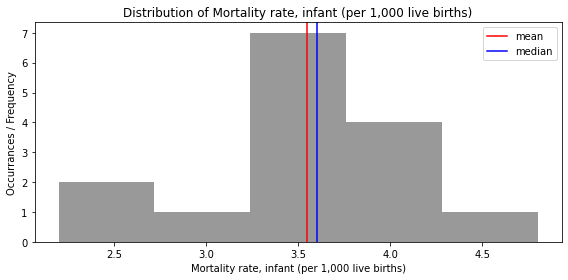

In [4]:
# a list of column names REMAINING NOW
cols_to_impute = []

# JUST FOR DEMONSTRATION OF THE APPROACH: draw two vertical lines
#
cols_to_impute.append("Mortality rate, infant (per 1,000 live births)")
for colname in cols_to_impute:
   fig, ax = plt.subplots(figsize = [8, 4])
   sns.distplot(a = dfJ[ colname ], bins = 5, # setting bins to 5
                hist = True, kde = False, rug = False, color = "black")
   plt.title(label = "Distribution of "+colname)
   plt.xlabel(xlabel = colname)
   plt.ylabel(ylabel = "Occurrances / Frequency")
   plt.axvline(x = dfJ[colname].mean(),   color = "red") # add vert. lines
   plt.axvline(x = dfJ[colname].median(), color = "blue")
   plt.legend(labels = ["mean", "median"])
   plt.tight_layout()
   plt.show()
   #pause_for_good()

# JUST FOR DEMONSTRATION OF THE APPROACH: impute with *median*
#
for colname in cols_to_impute:
   median = round(dfJ[colname].median(),  2)
   dfJ[colname].fillna(value = median, inplace = True)
   assert(False == dfJ[colname].isnull().any()) # "optional" assertion

# reset
cols_to_impute = []

<div style="margin: 2.5em 5em 0 0; color: ">
<p style="text-indent: 1.5em; text-align: justify">In this above case, the distribution of the specific column is negatively-skewed a little bit, and hence we may choose median to impute the null values with to compensate for centrality. However, a <b>threshold for determining the acceptability of skewness is necessary</b> because otherwise since the median is always "farther" from the side of skewness than the mean is, it (median) will always be the preferable choice.</p>

<p style="text-indent: 1.5em; text-align: justify">To impute all remaining numeric columns, we perform a <em>for</em>-loop to compute the <em>skewness</em> of each column with pandas package built-in function <em>.skew()</em> <sup>[<a href="#skew-function">12</a>]</sup>, with the definition of an acceptable range for skewness being [-1.5, +1.5]. Specifically,</p>

<p style="text-indent: 0em; text-align: justify; width: 50%; margin-left: 25%">
   <em>for</em> EACH COLUMN:<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<em>if</em>&nbsp; SKEWNESS is in the ACCEPTABLE RANGE:<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;impute with MEAN<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<em>else</em>: &nbsp;&nbsp;&nbsp;# left- or right-skewed<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;impute with MEDIAN
</p>
</div>

In [5]:
# DataFrame.skew() returns unbiased skew over requested
# axis, normalized by the CORRESPONDING SIZE - 1
skew_values = dfJ.skew(axis = 0) # skewness of each COLUMN

num_too_skewed = 0
# just check how much percentage of numeric columns are too skewed
# note: imputation takes place ONLY on NUMERIC columns
for col in dfJ.select_dtypes(include = [np.number]).columns:
   #print(skew_values[col])
   if abs( skew_values[col] ) > 1.50:
      num_too_skewed += 1
print(f"""
[{round(100.0*num_too_skewed / skew_values.shape[0], 0)}% \
of numeric columns are overly-skewed.]""")


# impute (for numeric columns)
#
for col in dfJ.select_dtypes(include = [np.number]).columns:

   value_of_imputation = 0.00
   if abs(skew_values[ col ]) > 1.50:
      # beyond skewness acceptable range, impute w/ MEDIAN
      value_of_imputation = dfJ[ col ].median()
   else:
      # within skewness acceptable range, impute w/ MEAN
      value_of_imputation = dfJ[ col ].mean()

   dfJ[ col ].fillna(value   = value_of_imputation,
                     inplace = True)
   assert(False == dfJ[ col ].isnull().any())
print("[Imputation done.]")
pause_for_good()  # end-of-part-1-1 (missing vals, imputation)


[29.0% of numeric columns are overly-skewed.]
[Imputation done.]

Press ENTER to continue...



#### Outlier Identification: The "1.5 Interquartile" Benchmark
<div style="margin: 2.5em 5em 0 0; color: ">

<p style="text-indent: 0em; text-align: justify">An outlier is a statistical observation markedly different in value from the rest of the sample. We first perform a visual outlier detection over the columns; the following are two boxplot diagrams on column features "Adjusted net enrollment rate, primary..." and "Adolescent fertility rate..." respectively.</p>
</div>

<div style="margin: 2.5em 5em 0 0; color: ">
<p style="text-indent: 1.5em; text-align: justify">Quantifiably, it is defined thresholded upon the result of</p>

<p style="text-indent: 1.5em; text-align: justify; width: 50%; margin-left: 25%">InterQuartile_Range
    &nbsp;=&nbsp; 3<sup>rd</sup>-Quartile - 1<sup>st</sup>-Quartile</p>

<p style="text-indent: 0em; text-align: justify">such that</p>
<p style="text-indent: -em; text-align: justify; width: 50%; margin-left: 25%">
   <em>if</em> &nbsp; OBSERVATION VALUE &nbsp;>&nbsp; 3<sup>rd</sup>-Quartile + 1.5 × Interquartile_Range<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<em>or</em> &nbsp; OBSERVATION VALUE &nbsp;<&nbsp; 1<sup>st</sup>-Quartile - 1.5 × Interquartile_Range<br style="margin-bottom: .7em">
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The data value is a potential outlier, and flag it <sup>[<a href="#skewness-threshold">11</a>], [<a href="#IQRRule">13</a>]</sup>.
    
</p>
    
<p style="text-indent: 1.5em; text-align: justify">For each numeric column (post-dropping), we create a binary 0-or-1 column to store outlier flags, where the flag "1" marks a potential outlier.</p>
</div>

In [6]:
for col in dfJ.select_dtypes(include = [np.number]).columns:

   # initialize the ASSOCIATED NEW COLUMN of FLAGS
   dfJ["out_"+col] = 0

   Q1  = dfJ[col].quantile(.25) # "lower" quantile (float64's)
   Q3  = dfJ[col].quantile(.75) # "upper" quantile
   IQR = Q3 - Q1                # inter-quantile range

   # NOTE:
   # here, the row index "i" can either be what is returned
   # from "iteritems()" as indexes from original dataset,
   # or simply start with 0, then 1, 2, 3, ...
   for j, value in dfJ[col].iteritems():
      # flag any outliers according to the "1.5 IQR" benchmark
      if value > Q3 + 1.5*IQR or \
         value < Q1 - 1.5*IQR:
         dfJ["out_"+col][j] = 1 # set flag to 1
   # end-of-this-column

print("[Outliers identified.]")

pause_for_good()  # end-of-part-1-2 (outliers)

<ipython-input-6-d7b766c0030c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJ["out_"+col][j] = 1 # set flag to 1


[Outliers identified.]

Press ENTER to continue...



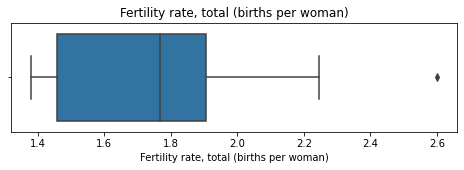

,Country Code Total,Country Name,Hult Region,Cool Name,"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)",...,"out_Maternal mortality ratio (modeled estimate, per 100,000 live births)",out_Mobile cellular subscriptions (per 100 people),"out_Mortality rate, infant (per 1,000 live births)","out_Population, total",out_Prevalence of undernourishment (% of population),out_Proportion of seats held by women in national parliaments (%),"out_School enrollment, primary (% net)","out_Self-employed, total (% of total employment)",out_Trade (% of GDP),"out_Tuberculosis death rate (per 100,000 people), including HIV"
64,FRO,Faeroe Islands,Western Europe,Jetfire,98.86814,10.685657,13.008642,1.296357,0.625429,0.922571,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Box - Plot : Fertility Rate (Western Europe) : 
# visual outlier detection (with boxplots)

feature_1 = "Fertility rate, total (births per woman)"
feature_2 = "CO2 emissions (metric tons per capita)"

fig, ax = plt.subplots(figsize = (8, 2))
sns.boxplot(x = feature_1, y = None, hue = None,
            orient = "h", data = dfJ)
plt.title(label = feature_1)
plt.xlabel(xlabel = feature_1)
plt.show()

dfJ.loc[ : , :][dfJ.loc[ : , 'out_Fertility rate, total (births per woman)'] == 1]

<div style="margin: 2.5em 5em 0 0; color: ">
<p>The average number of live births a woman would have by age 50 if she were subject, throughout her life, to the age-specific fertility rates observed in a given year. It is an important factor especially if fertility continues decline, the share of the population of working age also declines and that of older persons increases, leading to rising dependency ratios. Since many European countries such as Germany (1.38), Portugal (1.39), Italy (1.45) etc. have a rising older population and have lower values for this variable. However, Faroe Islands have a high value of 2.6, skewing the data to the right.</p></div>

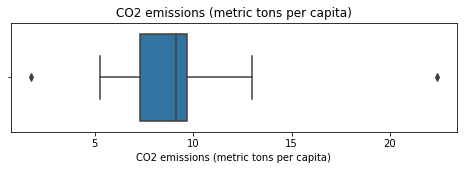

,Country Code Total,Country Name,Hult Region,Cool Name,"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)",...,"out_Maternal mortality ratio (modeled estimate, per 100,000 live births)",out_Mobile cellular subscriptions (per 100 people),"out_Mortality rate, infant (per 1,000 live births)","out_Population, total",out_Prevalence of undernourishment (% of population),out_Proportion of seats held by women in national parliaments (%),"out_School enrollment, primary (% net)","out_Self-employed, total (% of total employment)",out_Trade (% of GDP),"out_Tuberculosis death rate (per 100,000 people), including HIV"
111,LIE,Liechtenstein,Western Europe,Jetfire,99.217598,10.685657,1.754002,1.296357,0.625429,0.922571,...,0,0,0,0,0,0,1,0,0,0
115,LUX,Luxembourg,Western Europe,Jetfire,97.630753,8.981600,22.385472,0.512000,0.010000,0.226000,...,1,0,1,0,0,0,0,1,1,0


In [8]:
# Box - Plot : CO2 emissions (Western Europe) :

fig, ax = plt.subplots(figsize = (8, 2))
sns.boxplot(x = feature_2, y = None, hue = None,
            orient = "h", data = dfJ)
plt.title(label = feature_2)
plt.xlabel(xlabel = feature_2)
plt.show()

dfJ.loc[ : , :][dfJ.loc[ : , 'out_CO2 emissions (metric tons per capita)'] == 1]


<div style="margin: 2.5em 5em 0 0; color: ">
<p style="text-indent: 1.5em; text-align: justify;">The two outliers in this column are Luxembourg and Liechtenstein. CO2 emissions in Luxembourg is the highest both in the Western region and in the whole of EU (22.38%). Despite being a small country, one of the main reasons for this is the high number of passenger cars per 1,000 inhabitants. CO2 emissions in Liechtenstein is the lowest in the region. Sources suggest that one of the main reasons is the warm winter which resulted in less usage of heating fuel and natural gas.</p></div>

#### Obscurity/Anomalies in Data
<div style="margin: 2.5em 5em 0 0; color: ">

<p style="text-indent: 0em; text-align: justify;">In the original dataset, <b>row 120 (MFA)</b> and <b>185 (SXM)</b> are not in the Metadata sheet, and <b>most values in these two rows are missing</b>. We could drop the rows, but in order to maintain inclusion of countries, we keep these rows acknowledging that there is no way to verify those data and dropping them is preferable.</p>

<p style="text-indent: 1.5em; text-align: justify;">The mean of column "Contributing family workers, female (% of female employment)" is low, but values are comparatively high for "Employment to population ratio, 15+, female (%) (modeled ILO estimate)" and the "Proportion of seats held by women in national parliaments (%)".</p>

<p style="text-indent: 1.5em; text-align: justify;">It is abnormal that there is <b>no observation value</b> in the column "Reported cases of malaria", and while, Western European countries has managed to keep low cases of Malaria <sup>[<a href="#no-malaria">16</a>]</sup>.</p>

<br>
</div>

<div style="margin: 3em 5em 0 0; color: ">
    
###  Best Representative: An "Average" Western-European Country

<p style="text-indent: 0em; text-align: justify">
   Selecting the best "on-average" country (an observation row) from the region can be tricky and is based on what benchmark is used to interpret what averageness means.
</p>

<p style="text-indent: 0em; text-align: justify">We propose our rationale of treating equally the importance of each column, such that each country (row) has an associated "row vector" of numeric features that characterizes it. We then compute the <em>Euclidean distance</em> for each country from the average-valued vector of features and sort the countries by the distance such that <b>the shorter the distance, the closer it is from the average characteristics of all features considered</b>, as implemented in the following cell of code.</p>

</div>

In [11]:
## Part 2: Best "On-Average" Representative
#          (with IMPUTED DATA for sure)
#
print(end = "\n")
print("*" * N_STARS+"*****************************"+"*" * N_STARS+"\n"+ \
      "*" * N_STARS+" Part 2: Best Representative "+"*" * N_STARS+"\n"+ \
      "*" * N_STARS+"*****************************"+"*" * N_STARS+"\n")

# SELECT the list of names of (31, supposedly) numeric
# columns store it (with conversion .tolist()) IN A LIST
#
numeric_cols = dfJ.select_dtypes\
               (include = [np.number]).columns.copy()\
               .tolist() # a list of 31x2=62 col names
cols_to_delete = []
for colname in numeric_cols:
   if re.search("out_", colname): # if it begins with "out_"
      cols_to_delete.append(colname)
for colname in cols_to_delete: numeric_cols.remove(colname)

# compute a "row" of average feature/column values
# of length  len(numeric_cols) here 31.
row_of_averages = []
for colname in numeric_cols:
   row_of_averages.append( dfJ[colname].mean() )
assert(len(row_of_averages) == len(numeric_cols))

# for each row (i.e. country), compute its Euclidean
# distance from the "row_of_averages" above;
# store this distance result into a NEW COLUMN named
# "dist_to_regional_average"
#
dfJ["dist_to_regional_average"] = .0 # initialization
for i, country in dfJ.iterrows(): # for each row "i"
   # Euclidean distance of two lists of floats
   #
   dfJ["dist_to_regional_average"][i] = \
      dist_between_lists(country[ numeric_cols ].values, \
                         row_of_averages)
   # done computing distances

# make a hard copy to sort with
dfJ_to_sort = dfJ.copy()
dfJ_to_sort.sort_values(by        = "dist_to_regional_average", \
                        ascending = True)
# print the "closest" countri(es) by metric of "row of average"
N_TOP = 1
print(f"""[Best representative country is \
*{  dfJ_to_sort["Country Name"].head(n = N_TOP).values  }*.]""")

pause_for_good()  # end-of-part-2

<ipython-input-11-e446db8a1f30>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJ["dist_to_regional_average"][i] = \



***********************************************************
*************** Part 2: Best Representative ***************
***********************************************************

[Best representative country is *['Austria']*.]

Press ENTER to continue...



<div style="margin: 2em 5em 0 0">

### Most Exemplifying Features: Integrating Domain Knowledge

<br>

<p style="text-indent: 0em; text-align: justify">The dataset contains 45 distinct columns of features that characterize each country as an observation from various socio-economic standards. Except for the "Jetfire" Western Europe region on which this report is focused, there are 19 other regions including South America, multiple areas in Africa, Eastern Europe, the Middle East & Russia, Central Asia, and on. It is noticed that the diversification is significant across these regions globally in terms of economy, education, policies, and cultures. It brings insights and meaningful characteristics to identify features that make the region unique compared to the reset of the globe.</p>

<p style="text-indent: 1.5em; text-align: justify">We performed an analytical (perceptional) analysis for filtering the top 5 in the sense that there are variables that were distinctive but did not provided useful information. We then divided it into several categories, and tried to pick one feature for each.</p>

In [12]:
## Top 5 Columns for Western Europe Region: 
Top5 = dfJ[['Country Name', 'GNI per capita, Atlas method (current US$)',
            'Life expectancy at birth, total (years)',
            'Adolescent fertility rate (births per 1,000 women ages 15-19)', 
            'Proportion of seats held by women in national parliaments (%)',
            'School enrollment, primary (% net)']]

dfJ[['Country Name', 'GNI per capita, Atlas method (current US$)',
            'Life expectancy at birth, total (years)',
            'Adolescent fertility rate (births per 1,000 women ages 15-19)', 
            'Proportion of seats held by women in national parliaments (%)',
            'School enrollment, primary (% net)']]

Top5.describe()

,"GNI per capita, Atlas method (current US$)","Life expectancy at birth, total (years)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)"
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,60055.454545,79.606264,10.685657,26.681132,97.178037
std,34521.097997,2.666430,4.073969,7.787292,1.619737
min,22440.000000,70.213415,4.299800,8.479236,93.496330
25%,47145.000000,79.620122,9.279700,23.475000,97.178037
50%,50140.000000,80.187805,10.685657,26.681132,97.178037
75%,58407.500000,81.016463,10.685657,31.275000,98.101669
max,186080.000000,82.682927,23.968800,41.300000,99.778450


In [13]:
# Comapring the data with the rest of the world:  
world = df[['Country Name', 'GNI per capita, Atlas method (current US$)',
            'Life expectancy at birth, total (years)',
            'Adolescent fertility rate (births per 1,000 women ages 15-19)', 
            'Proportion of seats held by women in national parliaments (%)',
            'School enrollment, primary (% net)']]
world.describe()

,"GNI per capita, Atlas method (current US$)","Life expectancy at birth, total (years)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)"
count,193.000000,201.000000,194.000000,180.000000,131.000000
mean,14375.695962,69.702209,54.787428,17.532916,88.834660
std,24300.800605,8.968719,44.834884,10.225183,12.157151
min,180.000000,46.190000,0.574400,0.300000,42.735741
25%,1260.000000,64.501000,18.035950,9.950000,87.409653
50%,4330.000000,72.290000,44.123700,15.400000,93.359009
75%,15070.000000,75.912195,81.483700,23.425000,96.728035
max,186080.000000,82.682927,208.116200,56.300000,99.778450


<div style="margin: 2.5em 5em 0 0; color: ">

<br>
<p><b>Feature 1:&nbsp; GNI per Capita</b></p>
    
<p style="text-indent: 0em; text-align: justify">
Western Europe distinct itself from the rest of the world as one of the most influential economies, which is represented by its Gross National Income calculated as a 3-year moving average multiplied by where the regional mean (here \$62971.76), which is greater than 4 times the world's mean (\$14375.70). Economic wealth is one of the distinctive traits for developed countries which at the same time is positively related with educational, health and social indicators. This is seen in a correlation analysis we performed on how GNI variations are related to our other top 5 variables.
</p>

<p style="text-indent: 1.5em; text-align: justify">
In calculating gross national income (GNI—formerly referred to as GNP) in U.S. dollars for certain operational and analytical purposes, the World Bank uses the Atlas conversion factor instead of simple exchange rates. The purpose of the Atlas conversion factor is to reduce the impact of exchange rate fluctuations in the cross-country comparison of national incomes.
</p>

<p style="text-indent: 1.5em; text-align: justify">
The Atlas conversion factor<sup>[<a href="#atlas">14</a>]</sup> for any year is the average of a country’s exchange rate for that year and its exchange rates for the two preceding years, adjusted for the difference between the rate of inflation in the country and international inflation; the objective of the adjustment is to reduce any changes to the exchange rate caused by inflation.
</p>
    
    
    
<p style="margin-top: 1.5em"><b>Feature 2:&nbsp; Adolescent fertility rate (births per 1,000 women ages 15-19)</b></p>

<p style="text-indent: 1.5em; text-align: justify">Western Europe characterizes because it has an equitable health and education service for the populations. As it is shown in the descriptive graphs, the mean of the adolescent fertility rate has a significant difference compared with the world. It is a difference of more than 50 points. There is a moderate correlation between going to school and the adolescent fertility rate. Thus, a higher enrollment rate in primary school lowers the fertility rate in women ages 15-19. Besides, it is also a moderate negative correlation between the proportion of seat held by women in the national parliament with the fertility rate in young women. It means that the higher the fertility rate, the lower the proportion of women in the parliament.</p>


<p style="margin-top: 1.5em"><b>Feature 3:&nbsp; Life expectancy at birth, total (years)</b></p>
<p style="text-indent: 1.5em; text-align: justify">Life expectancy in Western Europe is 79.6 years which is 10 years greater than the world average of 69.7 years.<sup>[<a href="#life">17</a>]</sup>. Higher life expectancy is highly correlate with the enrollment rate and GNI per capita, thus, more develop countries have a higher life expectancy. Likewise, it is due to better health services, better education and lower adolescent fertility rate.</p> 

   
<p style="margin-top: 1.5em"><b>Feature 4:&nbsp; Proportion of seats held by women in national parliaments (%)</b></p>
<p style="text-indent: 1.5em; text-align: justify">This is an important social cause and an indicator of gender equality and empowerment of women. Women's representation in parliaments is one aspect of their opportunities in political and public life, and is therefore linked to women's empowerment. The world average for this variable is 17.53% and for the region it is at a high of 26.68%. The lowest for this region is Isle of Man (8.48%) and the highest is Netherlands (41.3%).
</p>



</div>

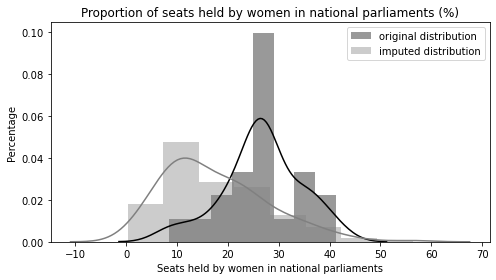

In [14]:
# Plotting graph for 'seats held by women in national parliaments in Western Europe Region' : 
# setting figure size 
fig, ax = plt.subplots(figsize = [7, 4],
                       sharex = True, # sharing x-axis between visualizations
                       sharey = True) # sharing y-axis between visualizations


# histogram for Western Europe region
sns.distplot(a     = dfJ['Proportion of seats held by women in national parliaments (%)'],
             bins  = 8,
             hist  = True,
             kde   = True, # activating kde
             rug   = False,
             color = 'black')


# histogram for comparing to rest of the world
sns.distplot(a     = df['Proportion of seats held by women in national parliaments (%)'],
             bins  = 8,
             hist  = True,
             kde   = True, # activating kde
             rug   = False,
             color = 'gray')

# titles, labels, and formatting
plt.title(label   = "Proportion of seats held by women in national parliaments (%)")
plt.xlabel(xlabel = 'Seats held by women in national parliaments')
plt.ylabel(ylabel = 'Percentage')

# this adds a legend
plt.legend(labels =  ['original distribution',
                      'imputed distribution'])

# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

<div style="margin: 2.5em 5em 0 0; color: ">

<br><p><b>Feature 5:&nbsp; Net Enrollment Rate in Primary Education</b></p>

<br>
<center>
   <img src="./fig/total-net-enrollment-rate-in-primary-education.png" width="500" />
   <br>
   Fig.&nbsp;3 &nbsp;Total net enrollment rate in primary education color-mapped <sup>[<a href="#primary-education">15</a>]</sup>.
</center>

    
<p style="text-indent: 0em; text-align: justify">The percentage enrollment rate of primary school age children is another distinguishing feature. Primary school education is focused on establishing the fundamental literacy and numeracy skills of children, as well as developing their understanding of the world. This metric is very high for developed countries especially in the Europe. The Western European region has a mean at a whopping 98.98% whereas the mean of the world is at 90.33%. The lowest in the region is at a high of 96.5%. Countries such as Germany (99.73%), Netherland (99.78%), Spain (99.85%) and Ireland (99.77%) have a Net Enrollment Rate of almost 100%. This is a very distinguishing factor for the region compared to the world and even when compared to the rest of Europe.</p></div>

<div style="margin: 2.5em 5em 0 0; color: ">

### Conclusion
<!--<p>[<i>Conclude the findings, strengths and weaknesses, future works, -- in 100 words</i>]</p>-->

<p style="text-indent: 0em; text-align: justify">In our study, we examined onto the socio-economic canvas revealed by the data of the Western European region. Findings include the most representative countri(es), noticeable and significant statistical characteristics of the dataset, and top representative features that in particular distinguish this region from others with supporting demographical information.  Technically, a standard procedure of pre-processing of data was performed. May we extend the study in the future, more aspects of socioeconomic concerns would be introduced when selecting and interpreting representative features to support convincing analyses on them. Also, multiple other imputation methods should be tested and compared to draw the one that best preserves the shape of data. </p>
    
</div>

<div style="margin: 5em 5em 0 0;">

<p style="font-size: 125%; font-weight: bold; margin: 3em 0 1.0em 0">
   References
</p>

<p id="worldbank" style="word-break: break-all; text-align: justify">[1]&nbsp; The World Bank Group. (2020). &nbsp;International Development, Poverty, & Sustainability.&nbsp; Retrieved from <a href="https://www.worldbank.org/" style="color: black">www.worldbank.org/</a></p>

<p id="databank" style="word-break: break-all; text-align: justify">[2]&nbsp; The World Bank Group. (2020). &nbsp;Data Bank - World Development Indicators.&nbsp; Retrieved from <a href="https://databank.worldbank.org/source/world-development-indicators" style="color: black">databank.worldbank.org/source/world-development-indicators</a></p>

<p id="covid-recession" style="word-break: break-all; text-align: justify">[3]&nbsp; The World Bank Group. (2020, June 8). &nbsp;The Global Economic Outlook During the COVID-19 Pandemic: A Changed World.&nbsp; <em>News</em>. Retrieved from <a href="https://www.worldbank.org/en/news/feature/2020/06/08/the-global-economic-outlook-during-the-covid-19-pandemic-a-changed-world" style="color: black">www.worldbank.org/en/news/feature/2020/06/08/the-global-economic-outlook-during-the-covid-19-pandemic-a-changed-world</a>.</p>

<p id="dubai-highway" style="word-break: break-all; text-align: justify">[4]&nbsp; Mo Azizi. (May 2020). &nbsp;Empty highway in Dubai because on coronavirus.&nbsp; Shutterstock. Retrieved from <a href="https://www.shutterstock.com/image-photo/empty-highway-dubai-because-on-coronavirus-1720712008" style="color: black">www.shutterstock.com/image-photo/empty-highway-dubai-because-on-coronavirus-1720712008</a> </p>

<p id="ration" style="word-break: break-all; text-align: justify">[5]&nbsp; Britannica. &nbsp;The rationalism of Descartes&nbsp; Retrieved from <a href="https://www.britannica.com/topic/Western-philosophy/The-rationalism-of-Descartes" style="color: black">www.britannica.com/topic/Western-philosophy/The-rationalism-of-Descartes</a></p>

<p id="scihis" style="word-break: break-all; text-align: justify">[6]&nbsp; Robert Wilde. (2019, July 3). &nbsp;14 Notable European Scientists Throughout History.&nbsp; ThoughtCo. Retrieved from <a href="https://www.thoughtco.com/notable-european-scientists-1221837" style="color: black">www.thoughtco.com/notable-european-scientists-1221837</a></p>

<p id="popu" style="word-break: break-all; text-align: justify">[7]&nbsp; Worldometers.info &nbsp;Western Europe Population.&nbsp; Retrieved from <a href="https://www.worldometers.info/world-population/western-europe-population/" style="color: black">www.worldometers.info/world-population/western-europe-population/</a></p>

<p id="ani-popu" style="word-break: break-all; text-align: justify">[8]&nbsp; Jeff Desjardins. (2017, November 7). &nbsp;Markets Animation: The Rapidly Aging Western World.&nbsp; Visual Capitalist. Retrieved from <a href="https://www.visualcapitalist.com/animation-rapidly-aging-western-world/" style="color: black">www.visualcapitalist.com/animation-rapidly-aging-western-world/</a></p>

<p id="gdp-growth" style="word-break: break-all; text-align: justify">[9]&nbsp; M. Szmigiera. (2019, August 9). &nbsp;GDP growth forecast: Western Europe, U.S., U.K. and Germany 2010-2023.&nbsp; Retrieved from <a href="www.statista.com/statistics/369222/gdp-growth-forecast-western-europe-vs-major-economies/" style="color: black">https://www.statista.com/statistics/369222/gdp-growth-forecast-western-europe-vs-major-economies/</a> </p>

<p id="walk" style="word-break: break-all; text-align: justify">[10]&nbsp; Kaique Rocha. (2016, June 11). &nbsp;People Walking on Pedestrian Lane during Daytime.&nbsp; Pexels. Retrieved from <a href="https://www.pexels.com/photo/people-brasil-guys-avpaulista-109919/" style="color: black">www.pexels.com/photo/people-brasil-guys-avpaulista-109919/</a></p>
    
<p id="skewness-threshold" style="word-break: break-all; text-align: justify">[11]&nbsp; Tabachnick, Barbara G., & Fidell, Linda S. (2013). &nbsp;<a href="https://www.pearson.com/us/higher-education/program/Tabachnick-Using-Multivariate-Statistics-6th-Edition/PGM332849.html?tab=authors" style="color: black">Using Multivariate Statistics, 6th Edition</a>.&nbsp; Pearson.</p>

<p id="skew-function" style="word-break: break-all; text-align: justify">[12]&nbsp; Pythontic.com. &nbsp;skew() Function In Pandas.&nbsp; Retrieved from <a href="https://pythontic.com/pandas/dataframe-computations/skew" style="color: black">pythontic.com/pandas/dataframe-computations/skew</a></p>
    
<p id="IQRRule" style="word-break: break-all; text-align: justify">[13]&nbsp; Taylor, C. &nbsp;What Is the Interquartile Range Rule?&nbsp; ThoughtCo. Retrieved from <a href="https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244" style="color: black; work-break: break-all">www.thoughtco.com/what-is-the-interquartile-range-rule-3126244</a></p>

<p id="atlas" style="word-break: break-all; text-align: justify">[14]&nbsp; The World Bank. &nbsp;The World Bank Atlas method - detailed methodology.&nbsp; The World Bank Data Help Desk. Retrieved from <a href="https://datahelpdesk.worldbank.org/knowledgebase/articles/378832-what-is-the-world-bank-atlas-method" style="color: black">datahelpdesk.worldbank.org/knowledgebase/articles/378832-what-is-the-world-bank-atlas-method</a></p>

<p id="primary-education" style="word-break: break-all; text-align: justify">[15]&nbsp; Our World in Data. &nbsp;Total net enrollment rate in primary education, 2015.&nbsp; Retrieved from <a href="https://ourworldindata.org/grapher/total-net-enrollment-rate-in-primary-education" style="color: black">ourworldindata.org/grapher/total-net-enrollment-rate-in-primary-education</a></p>

<p id="no-malaria" style="word-break: break-all; text-align: justify">[16]&nbsp; Why Some Countries Can Get Rid of Malaria and Others Can't.&nbsp; Healthline. Retrieved from <a href="https://www.healthline.com/health-news/why-some-countries-can-get-rid-of-malaria" style="color: black">www.healthline.com/health-news/why-some-countries-can-get-rid-of-malaria</a></p>

<p id="life" style="word-break: break-all; text-align: justify">[17]&nbsp; ThoughtCo. &nbsp;Overview of Life Expectancy.&nbsp; Retrieved from <a href="https://www.thoughtco.com/life-expectancy-overview-1435464#:~:text=It%20represents%20the%20average%20life,shape%20a%20country%20is%20in" style="color: black">www.thoughtco.com/life-expectancy-overview-1435464</a></p>
    
<p id="seats-women" style="word-break: break-all; text-align: justify">[18]&nbsp; (November 04, 2020) &nbsp;Seats held by women in parliament. (n.d.).&nbsp;  Retrieved from <a href="https://www.who.int/publications/data/nutrition/nlis/info/seats-held-by-women-in-national-parliament" style="color: black">www.who.int/publications/data/nutrition/nlis/info/seats-held-by-women-in-national-parliament"</a></p>
    
<p id="food-consump" style="word-break: break-all; text-align: justify">[19]&nbsp; Smith LC, Haddad L. Explaining child malnutrition in developing countries: a cross-country analysis. (1999) &nbsp;Food consumption and nutrition division discussion paper no. 60. Bonn: International Food Policy Research Institute&nbsp; Retrieved from <a href="http://www.ifpri.org/publication/explaining-child-malnutrition-developing-countries" style="color: black">www.ifpri.org/publication/explaining-child-malnutrition-developing-countries</a></p>
    
<p id="ghg" style="word-break: break-all; text-align: justify">[20]&nbsp; Tiseo, P., & 7, O. (2020, October 07).  &nbsp;EU-28: GHG emissions per capita&nbsp;  Retrieved from <a href="https://www.statista.com/statistics/986392/co2-emissions-per-cap-by-country-eu/" style="color: black">www.statista.com/statistics/986392/co2-emissions-per-cap-by-country-eu/</a></p>



</div>

<div style="margin-right: 5em">
<br>

<div style="font-size: 89%">
   <hr style="color: black; display: block; height: 1px; border: 0; margin-bottom: .6em">
   &nbsp;&nbsp;Copytright © 2020 &nbsp;Almeida, J.B.G. et. al.&nbsp; All Rights Reserved. <span style="float: right">Hult International Business School, Hult San Francisco&nbsp;&nbsp;</span>
</div>
    
</div>